In [55]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from config import Config
import matplotlib
import pytz


def get_temp_df() -> pd.DataFrame:
    engine = create_engine(Config.DATABASE_URI)
    query = "SELECT timestamp, name AS room, temperature, humidity FROM records INNER JOIN devices ON devices.id = records.device_id ORDER BY timestamp DESC"
    df = pd.read_sql_query(query, engine)
    df = df[df["room"].isin(["Chambre A&M", "Chambre Lucas", "Extérieur", "Salon"])]
    return df


df = get_temp_df()
europe = pytz.timezone("Europe/Paris")
df["timestamp"] = df["timestamp"].dt.tz_localize("UTC")
df["timestamp"] = df["timestamp"].dt.tz_convert(europe)

# df = df[df["room"].isin(["Chambre A&M", "Chambre Lucas", "Salon"])]

now = pd.Timestamp.now(tz=europe)
now_minus_minutes = now - pd.Timedelta(minutes=10)
now_minus_hours = now - pd.Timedelta(hours=1)
now_minus_days = now - pd.Timedelta(days=7)


print(df)
print(df.dtypes)

                             timestamp           room  temperature  humidity
0     2024-12-10 14:36:22.652035+01:00          Salon         20.4      45.0
1     2024-12-10 14:36:22.652035+01:00  Chambre Lucas         19.2      46.0
2     2024-12-10 14:36:22.652035+01:00      Extérieur          5.7      77.0
3     2024-12-10 14:36:22.652035+01:00    Chambre A&M         16.8      45.0
4     2024-12-10 14:34:49.493526+01:00      Extérieur          5.7      77.0
5     2024-12-10 14:34:49.493526+01:00  Chambre Lucas         19.2      46.0
6     2024-12-10 14:34:49.493526+01:00    Chambre A&M         16.8      45.0
7     2024-12-10 14:34:49.493526+01:00          Salon         20.4      45.0
8     2024-12-10 14:33:16.504550+01:00      Extérieur          5.7      77.0
9     2024-12-10 14:33:16.504550+01:00  Chambre Lucas         19.2      46.0
10    2024-12-10 14:33:16.504550+01:00    Chambre A&M         16.8      45.0
11    2024-12-10 14:33:16.504550+01:00          Salon         20.4      45.0

In [56]:
# Temperatures within the last minutes
df_last_minutes = df[(df['timestamp'] >= now_minus_minutes) & (df['timestamp'] <= now)]

# Temperatures within the last hour
df_last_hour = df[(df['timestamp'] >= now_minus_hours) & (df['timestamp'] <= now)]

# Temperatures within the last week
df_last_week = df[(df['timestamp'] >= now_minus_days) & (df['timestamp'] <= now)]


                            timestamp           room  temperature  humidity
0    2024-12-10 14:36:22.652035+01:00          Salon         20.4      45.0
1    2024-12-10 14:36:22.652035+01:00  Chambre Lucas         19.2      46.0
2    2024-12-10 14:36:22.652035+01:00      Extérieur          5.7      77.0
3    2024-12-10 14:36:22.652035+01:00    Chambre A&M         16.8      45.0
4    2024-12-10 14:34:49.493526+01:00      Extérieur          5.7      77.0
5    2024-12-10 14:34:49.493526+01:00  Chambre Lucas         19.2      46.0
6    2024-12-10 14:34:49.493526+01:00    Chambre A&M         16.8      45.0
7    2024-12-10 14:34:49.493526+01:00          Salon         20.4      45.0
8    2024-12-10 14:33:16.504550+01:00      Extérieur          5.7      77.0
9    2024-12-10 14:33:16.504550+01:00  Chambre Lucas         19.2      46.0
10   2024-12-10 14:33:16.504550+01:00    Chambre A&M         16.8      45.0
11   2024-12-10 14:33:16.504550+01:00          Salon         20.4      45.0
12   2024-12

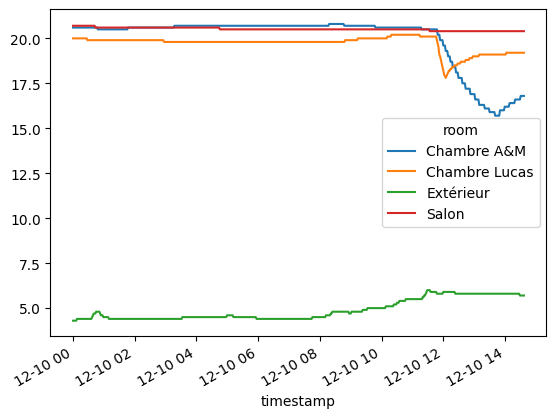

In [57]:
# Filter 'timestamp' between 2024-12-09 00:00:00 and 2024-12-09 23:59:59
df_today = df[(df['timestamp'] >= '2024-12-10 00:00:00') & (df['timestamp'] <= '2024-12-10 23:59:59')]
print(df_today)

ax = df_today.pivot(index='timestamp', columns='room', values='temperature').plot()

In [58]:
pd.set_option('display.max_rows', None)
print(df_last_minutes)

                          timestamp           room  temperature  humidity
0  2024-12-10 14:36:22.652035+01:00          Salon         20.4      45.0
1  2024-12-10 14:36:22.652035+01:00  Chambre Lucas         19.2      46.0
2  2024-12-10 14:36:22.652035+01:00      Extérieur          5.7      77.0
3  2024-12-10 14:36:22.652035+01:00    Chambre A&M         16.8      45.0
4  2024-12-10 14:34:49.493526+01:00      Extérieur          5.7      77.0
5  2024-12-10 14:34:49.493526+01:00  Chambre Lucas         19.2      46.0
6  2024-12-10 14:34:49.493526+01:00    Chambre A&M         16.8      45.0
7  2024-12-10 14:34:49.493526+01:00          Salon         20.4      45.0
8  2024-12-10 14:33:16.504550+01:00      Extérieur          5.7      77.0
9  2024-12-10 14:33:16.504550+01:00  Chambre Lucas         19.2      46.0
10 2024-12-10 14:33:16.504550+01:00    Chambre A&M         16.8      45.0
11 2024-12-10 14:33:16.504550+01:00          Salon         20.4      45.0
12 2024-12-10 14:31:43.394169+01:00   

In [59]:
# Minimum temperature within the last hour for each room
min_temp_last_hour = df_last_hour.groupby('room')['temperature'].min()
print(min_temp_last_hour)

room
Chambre A&M      15.7
Chambre Lucas    19.1
Extérieur         5.7
Salon            20.4
Name: temperature, dtype: float64


            room  min   max
0    Chambre A&M  6.2  23.1
1  Chambre Lucas  6.2  23.1
2      Extérieur -0.3  23.1
3          Salon  6.2  23.1


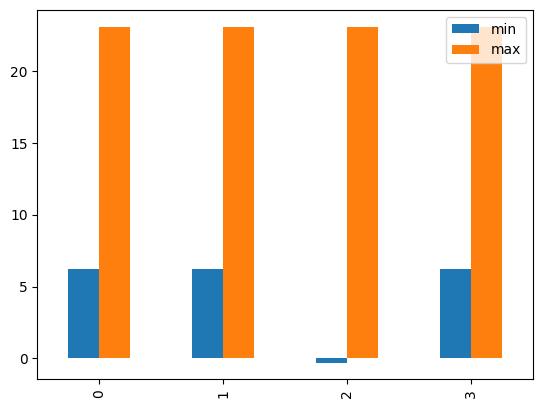

In [60]:
# Min and max temperatures within the last hour for each room
min_max = df.groupby('room')['temperature'].agg(['min', 'max']).reset_index()
min_max.plot(kind='bar')
print(min_max)

<Axes: >

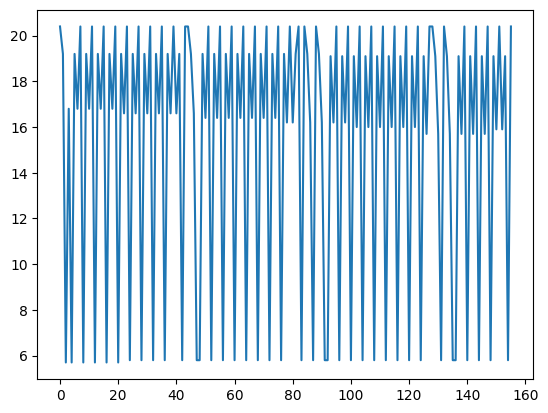

In [61]:
# Has the temperature been stable in the last hour?
df_last_hour['temperature'].plot()

In [62]:
# Temperatures within the last week
df_last_week = df[(df['timestamp'] >= now_minus_days) & (df['timestamp'] <= now)]
df_last_week.groupby([df_last_week['timestamp'].dt.date, 'room']).mean()

timestamp  temperature  \
timestamp  room                                                             
2024-12-03 Chambre A&M   2024-12-03 19:17:56.273095680+01:00    20.780939   
           Chambre Lucas 2024-12-03 19:17:56.273095680+01:00    20.387569   
           Extérieur     2024-12-03 19:17:56.273095680+01:00     6.968232   
           Salon         2024-12-03 19:18:37.474279680+01:00    20.685319   
2024-12-04 Chambre A&M   2024-12-04 12:00:19.979712256+01:00    20.720604   
           Chambre Lucas 2024-12-04 12:00:07.673892352+01:00    20.262069   
           Extérieur     2024-12-04 12:00:15.461573888+01:00     5.849028   
           Salon         2024-12-04 12:00:07.673892352+01:00    20.826940   
2024-12-05 Chambre A&M   2024-12-05 12:02:24.648529920+01:00    20.647903   
           Chambre Lucas 2024-12-05 12:02:24.439108608+01:00    20.108720   
           Extérieur     2024-12-05 12:01:54.182595328+01:00     3.332818   
           Salon         2024-12-05 12:03:09.958730240+01:00    20.656969   
2024-12-06 Chambre A&M   2024-12-06 11:59:58.561063680+01:00    20.659419   
           Chambre Lucas 2024-12-06 11:59:58.561063680+01:00    20.310872   
           Extérieur     2024-12-06 11:59:58.561063680+01:00     8.436598   
           Salon         2024-12-06 11:59:58.561063680+01:00    20.693541   
2024-12-07 Chambre A&M   2024-12-07 11:58:12.938274048+01:00    20.626378   
           Chambre Lucas 2024-12-07 11:56:09.405080832+01:00    20.309663   
           Extérieur     2024-12-07 11:58:12.938274048+01:00     6.982378   
           Salon         2024-12-07 11:58:37.945769984+01:00    20.563391   
2024-12-08 Chambre A&M   2024-12-08 12:01:07.580752128+01:00    20.853946   
           Chambre Lucas 2024-12-08 12:00:51.987711232+01:00    20.464177   
           Extérieur     2024-12-08 12:01:23.341126656+01:00     6.325054   
           Salon         2024-12-08 12:01:23.341126656+01:00    20.569762   
2024-12-09 Chambre A&M   2024-12-09 12:00:14.360831488+01:00    20.751078   
           Chambre Lucas 2024-12-09 12:00:14.360831488+01:00    20.138147   
           Extérieur     2024-12-09 12:00:14.360831488+01:00     5.378341   
           Salon         2024-12-09 12:01:03.197343744+01:00    20.656156   
2024-12-10 Chambre A&M   2024-12-10 07:18:25.292643584+01:00    19.972438   
           Chambre Lucas 2024-12-10 07:18:25.292643584+01:00    19.705830   
           Extérieur     2024-12-10 07:18:25.292643584+01:00     4.885512   
           Salon         2024-12-10 07:18:25.292643584+01:00    20.516431   

                           humidity  
timestamp  room                      
2024-12-03 Chambre A&M    50.906077  
           Chambre Lucas  50.475138  
           Extérieur      87.226519  
           Salon          49.011080  
2024-12-04 Chambre A&M    50.605178  
           Chambre Lucas  48.894397  
           Extérieur      82.475162  
           Salon          46.903017  
2024-12-05 Chambre A&M    48.118102  
           Chambre Lucas  46.082781  
           Extérieur      85.301657  
           Salon          42.782080  
2024-12-06 Chambre A&M    49.266954  
           Chambre Lucas  47.881593  
           Extérieur      74.110872  
           Salon          44.036598  
2024-12-07 Chambre A&M    50.164324  
           Chambre Lucas  48.350706  
           Extérieur      81.464865  
           Salon          49.298056  
2024-12-08 Chambre A&M    49.238919  
           Chambre Lucas  48.395022  
           Extérieur      80.964363  
           Salon          46.473002  
2024-12-09 Chambre A&M    48.976293  
           Chambre Lucas  46.241379  
           Extérieur      79.959052  
           Salon          47.822894  
2024-12-10 Chambre A&M    47.136042  
           Chambre Lucas  44.712014  
           Extérieur      78.952297  
           Salon          45.063604